### Importing Libraries

In [1]:
import math
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# 1. Data Analysis

## 1.1. Data Loading

In [2]:
df_train = pd.read_csv('train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_test = pd.read_csv('test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## 1.2. Data Cleaning

### 1.2.1. Removing Duplicates

In [6]:
print(
    df_train[df_train.duplicated()].size,
    df_test[df_train.duplicated()].size,
    sep=', '
)

0, 0


C:\Users\Moaaz\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


None of the two dataframes has duplicate rows.

### 1.2.2. Removing Columns that have 50% + NaN/NA

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


From the previous it's clear that column `Cabin` is the only column that has more null values than valid values in both files. Thus we remove it from both. We will also remove the columns `Ticket`, `PassengerId`, and `Name`, as we will not use them later in the analysis.

In [9]:
df_train.drop('Cabin', axis=1, inplace=True)
df_train.drop('Ticket', axis=1, inplace=True)
df_train.drop('Name', axis=1, inplace=True)
df_train.drop('PassengerId', axis=1, inplace=True)
df_test.drop('Cabin', axis=1, inplace=True)
df_test.drop('Ticket', axis=1, inplace=True)
df_test.drop('Name', axis=1, inplace=True)
df_test.drop('PassengerId', axis=1, inplace=True)
# Quick check, it suffices to check for df_train
df_train.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.25,S


### 1.2.3. Handling Outliers

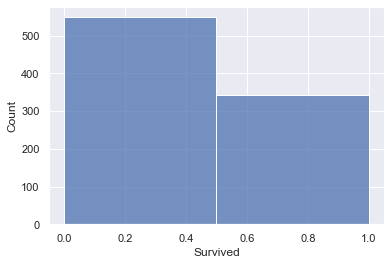

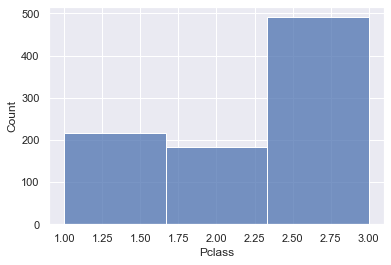

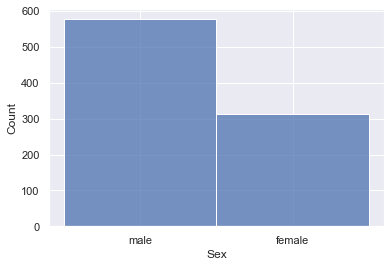

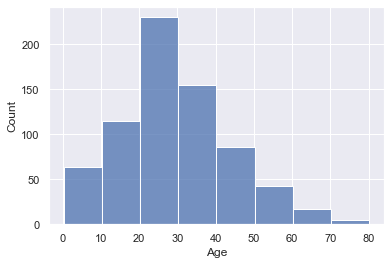

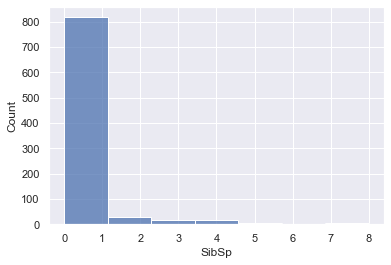

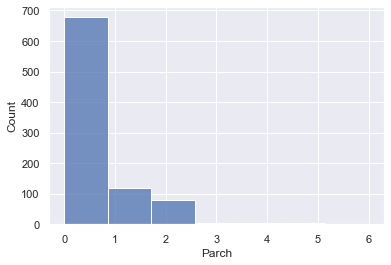

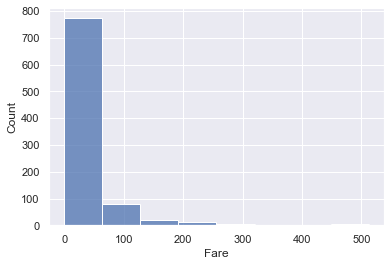

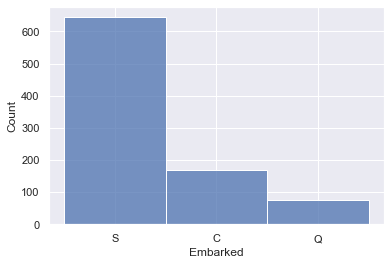

In [10]:
# For df_train
for colNum in range(df_train.columns.size):
    col = df_train[df_train.columns[colNum]]
    sns.histplot(col, bins=min(8, col.unique().size))
    plt.show()


There doesn't seem to be any outliers with any of the columns of `df_train`.

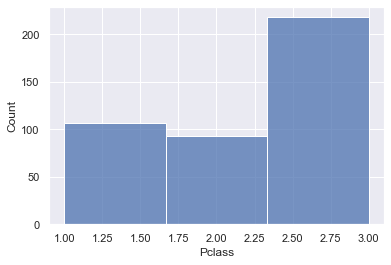

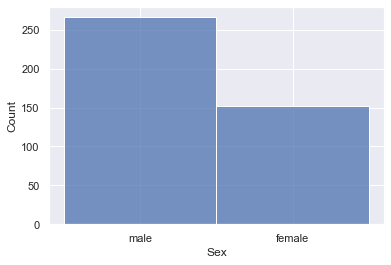

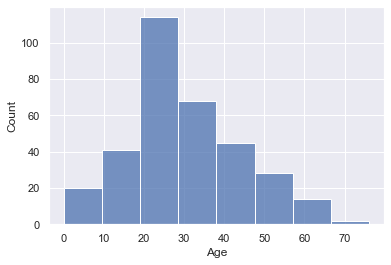

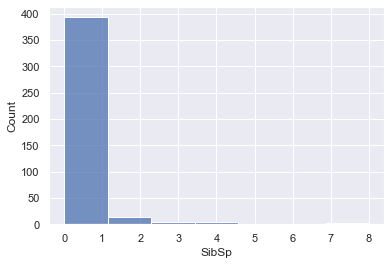

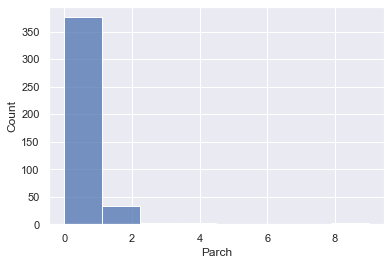

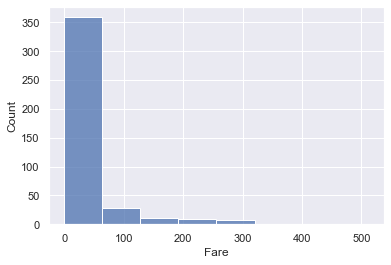

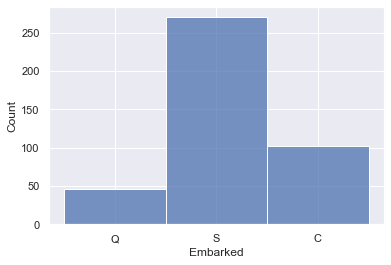

In [11]:
# For df_test
for colNum in range(df_test.columns.size):
    col = df_test[df_test.columns[colNum]] # `df_train` left intentionally unchanged
    sns.histplot(col, bins=min(8, col.unique().size))
    plt.show()


We will further explore the relationship between the Pclass and the survival by using a `matplotlib` regplot with jitter.

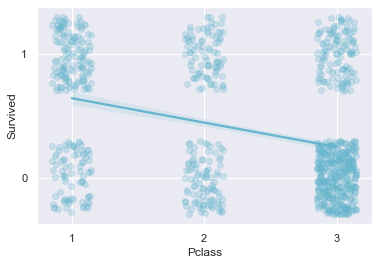

In [21]:
sns.regplot(
    data=df_train,
    x='Pclass', y='Survived', 
    x_jitter=0.15, y_jitter=0.3, 
    color=sns.color_palette()[9],
    scatter_kws={'alpha':1/4}
)
plt.xticks([1, 2, 3])
plt.yticks([0, 1]);

As is the case with `df_train`, no outliers exist within any of the columns of `df_test`.
It's worth noticing that `df_test` has no `Survived` column.

### 1.2.4. Handling Missing Values

> ### _For `df_train`_

In [13]:
# Check the `info` once more
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


Based on the previous information, it seems reasonable to do the following:
- Remove the two rows that have missing values for the `Embarked` column.
- Compensate with the average for the `Age` column.

We will perform that in the following two notebooks.

In [14]:
# Remove the rows with missing data for `Embarked`
df_train = df_train[~ df_train['Embarked'].isnull()]
# Verify the results
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [15]:
# Compensate with the average for column `Age`
df_train.fillna(df_train.mean(), inplace=True)
# Check for the effect
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


C:\Users\Moaaz\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


> ### _For `df_test`_

In [16]:
# Check the `info` once more
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


Based on the previous information, it's seems best to make a similar decision to that made with `df_train`; that is, to remove the row with the missing value for `Fare` and compensate with the average for `Age`.

In [17]:
# Remove the rows with missing data for `Fare`
df_test = df_test[~ df_test['Fare'].isnull()]
# Verify the results
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    417 non-null    int64  
 1   Sex       417 non-null    object 
 2   Age       331 non-null    float64
 3   SibSp     417 non-null    int64  
 4   Parch     417 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  417 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 26.1+ KB


In [18]:
# Compensate with the average for column `Age`
df_test.fillna(df_test.mean(), inplace=True)
# Check for the effect
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    417 non-null    int64  
 1   Sex       417 non-null    object 
 2   Age       417 non-null    float64
 3   SibSp     417 non-null    int64  
 4   Parch     417 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  417 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 26.1+ KB


C:\Users\Moaaz\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Now we are done with the data cleaning part (hope so), so I think it's time move on to the next step, _Exploratory Data Analysis (EDA)_.

## 1.3. Exploratory Data Analysis

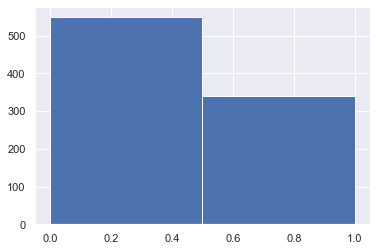

In [19]:
plt.hist(df_train['Survived'], bins=2);

One trivial observation we can make at first is that the number of those who didn't survive is way larger than those who survived.

At this point, it might be useful to define two more dataframes; one for those who survived, and the other for those who didn't.

In [20]:
df_survived = df_train.query('Survived == True')
df_drowned  = df_train.query('Survived == False')

We now turn to identifying patterns related to age, sex, Pclass, etc.

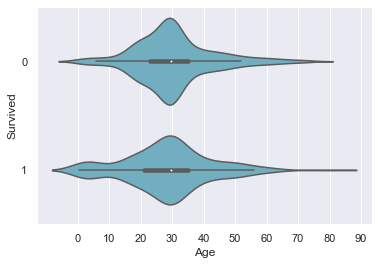

In [21]:
# Age
sns.violinplot(data=df_train, y='Survived', x='Age', color=sns.color_palette()[9], orient='h')
plt.xticks(np.arange(0, 90+10, 10));

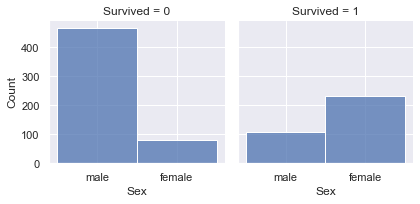

In [22]:
# Sex
g = sns.FacetGrid(df_train, col='Survived');
g.map(sns.histplot, 'Sex')

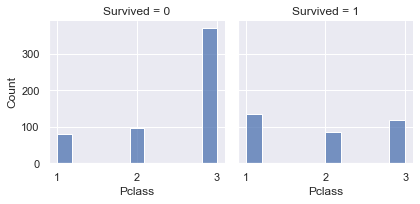

In [23]:
# Pclass
g = sns.FacetGrid(df_train, col='Survived')
g.map(sns.histplot, 'Pclass')
plt.xticks([1, 2, 3]);

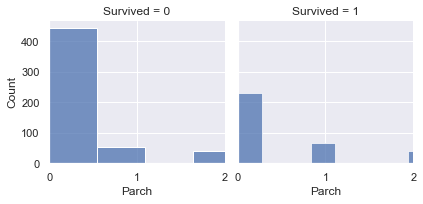

In [24]:
# Parch
g = sns.FacetGrid(df_train, col='Survived')
g.map(sns.histplot, 'Parch')
plt.xticks([0, 1, 2])
plt.xlim(0, 2);

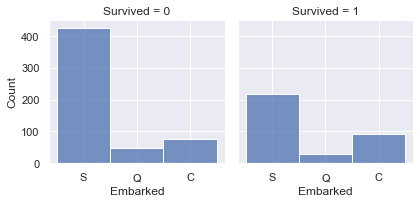

In [25]:
# Embarked
g = sns.FacetGrid(df_train, col='Survived')
g.map(sns.histplot, 'Embarked');

One last step before getting started with machine learning work is to convert categorical data into quantitative (numerical) data. To achieve this, we will follow the following conversion scheme:
- Sex 
  - male → 0
  - female → 1
- Embarked
  - S → 0
  - Q → 1
  - C → 2

In [26]:
df_train.replace('male', 0, inplace=True)
df_train.replace('female', 1, inplace=True)
df_train.replace('S', 0, inplace=True)
df_train.replace('Q', 1, inplace=True)
df_train.replace('C', 2, inplace=True)

df_test.replace('male', 0, inplace=True)
df_test.replace('female', 1, inplace=True)
df_test.replace('S', 0, inplace=True)
df_test.replace('Q', 1, inplace=True)
df_test.replace('C', 2, inplace=True)

df_train.info(), df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int64  
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 94.8 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    417 non-null    int64  
 1   Sex       417 non-null    int64  
 2   Age       417 non-null    float64
 3   SibSp     417 non-null    int64  
 4   Parch     417 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  417 non-null    int64  


(None, None)

In [27]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,2
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


# 2. Training the Model

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [29]:
X_train = df_train.drop("Survived", axis=1).copy()
Y_train = df_train["Survived"]
X_test  = df_test.copy()
X_train.shape, Y_train.shape, X_test.shape

((889, 7), (889,), (417, 7))

In [30]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

98.2

In [31]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

68.39

In [32]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

79.19